# Detectie van gezichten

### Stijn Oomes
donderdag 8 september 2022

## Importeer libraries

Importeer de relevante libraries.

`opencv` en `numpy`en `matplotlib`

In [12]:
import cv2 as cv

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
print(cv.__version__)

4.6.0


## Importeer en toon afbeelding

Zoek een kleuren foto met 7 gezichten of meer.

Laad de afbeelding in.

Laat de foto op het scherm zien. Hoeveel gezichten zie je zelf?
 
Hint: `imread`, `imshow` uit de matplotlib library

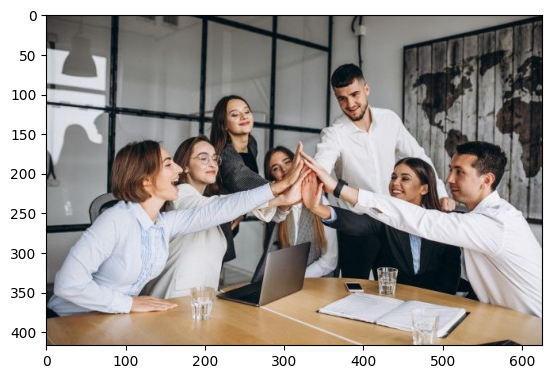

In [14]:
img = plt.imread('grup.jpg')
plt.imshow(img)
plt.show()

Welk datatype heeft de ingeladen afbeelding?


Hoe groot is de afbeelding in pixels?

In [15]:
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(417, 626, 3)


## Zet een kleurenplaatje om in een grijswaarde plaatje.

Als je foto al zwart-wit is dan kun je deze stap overslaan.

In [16]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [17]:
gray.shape

(417, 626)

## Initieer detector

Zoek het pad van de .xml file met de classifier: haarcascade_frontalface_default.xml

Initieer de Cascade Classifier.

In [18]:
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

print("Is de classifier leeg? --> " + str(face_cascade.empty()) + "  (moet 'False', dus 'niet leeg', zijn)")

Is de classifier leeg? --> False  (moet 'False', dus 'niet leeg', zijn)


## Detecteer gezichten

Bepaal met de classifier ``face_cascade.detectMultiScale()`` de gezichten in het plaatje.

Hoeveel heb je er gevonden?

In [19]:
faces = face_cascade.detectMultiScale(
gray, scaleFactor=1.2, minNeighbors=5, minSize=(10,10), flags=cv.CASCADE_SCALE_IMAGE)

print("Aantal gezichten: " + str(faces.shape[0]))

Aantal gezichten: 2


In [20]:
faces

array([[181, 162,  49,  49],
       [223, 108,  46,  46]])

## Toon rechthoeken rond gezichten

Toon rechthoeken om de gevonden gezichten.

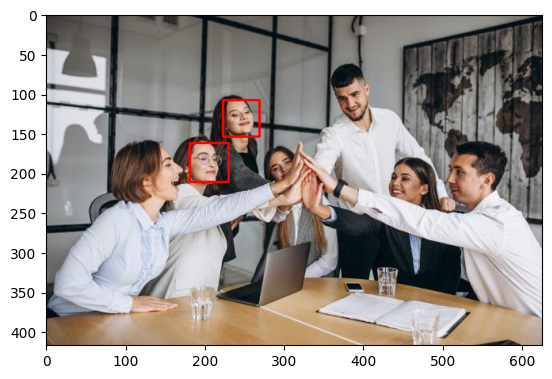

In [21]:
for (x,y,w,h) in faces:
    img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

plt.imshow(img)

## Evalueer de resultaten

Hoe goed is jouw detector in vergelijking met wat je zelf ziet?

Kun je de parameters van `face_cascade.detectMultiScale` varieren zodat de detectie beter wordt?

## Bonus 1: detecteer ook de ogen en de mond

Hint: er zijn nog meer .xml files met detectoren

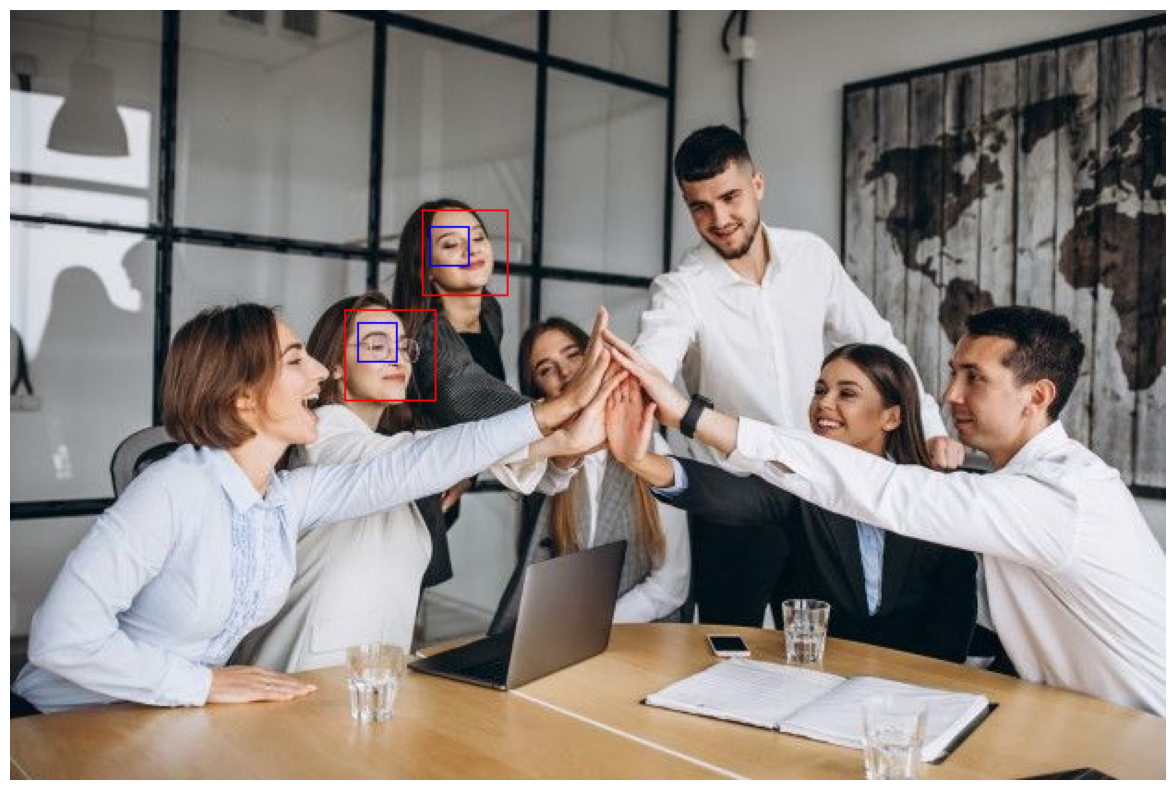

In [23]:
img2 = plt.imread('grup.jpg')

sc = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_smile.xml')
ec = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_eye.xml')

for (x,y,w,h) in faces:
    cv.rectangle(img2,(x,y),(x+w,y+h),(255,0,0),1)

for (x,y,w,h) in faces:
    face = img2[y:y+h, x:x+w]
    face_gray = face[:,:,1]
    smiles = sc.detectMultiScale(face_gray, 1.1, 1, minSize=(5,5), flags=cv.CASCADE_SCALE_IMAGE)
    eyes = ec.detectMultiScale(face_gray, 1.001, 1, minSize=(1,1), flags=cv.CASCADE_SCALE_IMAGE)
    for smile in smiles:
        cv.rectangle(face, smile, (0,255,0), 1)
    for eye in eyes:
        cv.rectangle(face, eye, (0,0,255), 1)


plt.figure(figsize=(15,10))
plt.imshow(img2)
plt.axis('off');

## Bonus 2: analyseer de afbeeldingen uit je webcam

Hint: ``VideoCapture()`` uit de ``OpenCV`` library

In [ ]:
# jouw code


